In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('train.csv', usecols=['Fare', 'Age', 'Survived'])

In [7]:
df.head(

)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [9]:
df['Age_Imputed']=df['Age']

In [10]:
df.sample(5)

,Survived,Age,Fare,Age_Imputed
95,0,NaN,8.0500,NaN
360,0,40.0,27.9000,40.0
439,0,31.0,10.5000,31.0
888,0,NaN,23.4500,NaN
57,0,28.5,7.2292,28.5


In [11]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns="Survived"), df['Survived'], test_size=0.2)

In [12]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [13]:
X_train.sample(5)

,Age,Fare,Age_Imputed
434,50.0,55.9000,50.0
641,24.0,69.3000,24.0
180,NaN,69.5500,NaN
58,5.0,27.7500,5.0
534,30.0,8.6625,30.0


In [14]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age_Imputed'].isnull().sum(), random_state=0).values

<ipython-input-14-aed5b7c1ed45>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age_Imputed'].isnull().sum(), random_state=0).values


In [19]:
X_train.sample(5)

,Age,Fare,Age_Imputed
589,NaN,8.0500,1.0
683,14.0,46.9000,14.0
685,25.0,41.5792,25.0
641,24.0,69.3000,24.0
313,28.0,7.8958,28.0


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-29-f32d4d13ec63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label="Original", hist=False)
<ipython-input-29-f32d4d13ec63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_Imputed'], label="Imputed", hist=False)


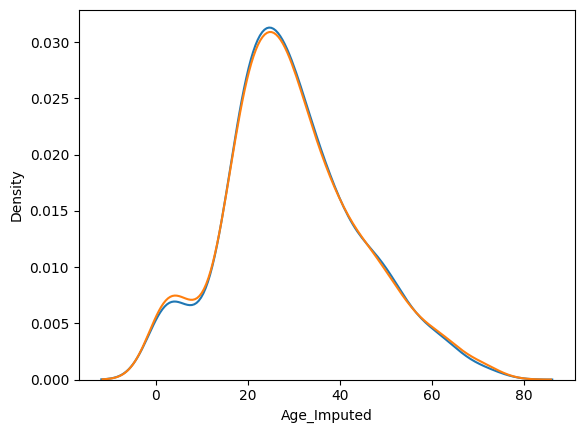

In [29]:
sns.distplot(X_train['Age'], label="Original", hist=False)
sns.distplot(X_train['Age_Imputed'], label="Imputed", hist=False)
plt.show()


In [32]:
print(f"Original Dataset Variance:{X_train['Age'].var()}")
print(f"After Random Imputation Dataset Variance:{X_train['Age_Imputed'].var()}")

Original Dataset Variance:211.74688811235785
After Random Imputation Dataset Variance:220.01511345134264


In [33]:
X_train[['Age', 'Age_Imputed', 'Fare']].cov()

,Age,Age_Imputed,Fare
Age,211.746888,211.746888,79.207692
Age_Imputed,211.746888,220.015113,67.829895
Fare,79.207692,67.829895,2364.696425


<Axes: >

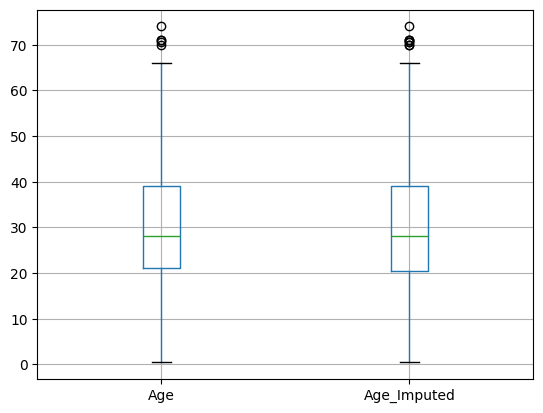

In [35]:
X_train[['Age', 'Age_Imputed']].boxplot()